In [155]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [156]:
df = pd.read_csv('D:\InfernoPrediction\Weather\dataset.csv')

In [157]:
print("Data Types:", df.dtypes)

Data Types: dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure               float64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object


In [158]:
df['dt']=pd.to_datetime(df['dt'], unit='s')

In [159]:
df=df.set_index('dt',drop=False).resample('24h').mean()
df2=df.reset_index(level=0, inplace=True)
df

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
0,2017-05-01,36000.0,-29.588744,152.332031,49.280000,44.964167,49.280000,49.280000,1021.770833,NaN,NaN,82.208333,5.173333,221.458333,NaN,NaN,NaN,NaN,68.083333,803.000000
1,2017-05-02,36000.0,-29.588744,152.332031,53.165000,48.962500,53.165000,53.165000,1021.112500,NaN,NaN,83.541667,6.785417,198.000000,NaN,NaN,NaN,NaN,47.375000,802.125000
2,2017-05-03,36000.0,-29.588744,152.332031,54.957500,48.617083,54.957500,54.957500,1025.050000,NaN,NaN,83.250000,11.287500,110.416667,0.474,NaN,NaN,NaN,81.583333,740.416667
3,2017-05-04,36000.0,-29.588744,152.332031,51.762500,44.232917,51.762500,51.762500,1029.116667,NaN,NaN,84.208333,12.173333,105.416667,0.410,NaN,NaN,NaN,69.833333,777.791667
4,2017-05-05,36000.0,-29.588744,152.332031,47.787500,40.579583,47.787500,47.787500,1029.587500,NaN,NaN,79.750000,9.292083,107.083333,NaN,NaN,NaN,NaN,32.916667,801.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2020-01-28,39600.0,-29.588744,152.332031,79.137083,85.348750,79.137083,79.137083,1011.500000,NaN,NaN,77.000000,2.856667,185.833333,NaN,NaN,NaN,NaN,11.375000,800.500000
1003,2020-01-29,39600.0,-29.588744,152.332031,81.332917,89.511250,81.332917,81.332917,1013.666667,NaN,NaN,79.208333,2.704583,123.375000,NaN,1.593077,NaN,NaN,35.875000,638.250000
1004,2020-01-30,39600.0,-29.588744,152.332031,79.306250,86.792500,79.306250,79.306250,1015.333333,NaN,NaN,78.750000,1.984167,130.958333,NaN,0.602500,NaN,NaN,31.250000,700.625000
1005,2020-01-31,39600.0,-29.588744,152.332031,77.540833,82.774583,77.540833,77.540833,1016.000000,NaN,NaN,75.291667,2.820833,128.375000,NaN,NaN,NaN,NaN,21.250000,801.125000


In [160]:
# print("Data Types:", df.dtypes)

In [161]:
get_data = df['temp']
get_data.index = df['dt']
get_data.head()

dt
2017-05-01    49.2800
2017-05-02    53.1650
2017-05-03    54.9575
2017-05-04    51.7625
2017-05-05    47.7875
Name: temp, dtype: float64

In [162]:
def process_data(dataset, start, end, past_size,future_size):
  datas = []
  labels = []

  start = start + past_size
  if end is None:
    end = len(dataset) - future_size

  for i in range(start,end):
    indices = range(i-past_size, i)
    datas.append(np.reshape(dataset[indices], (past_size, 1)))
    labels.append(dataset[i+future_size])
  return np.array(datas), np.array(labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B51681128>],
      dtype=object)

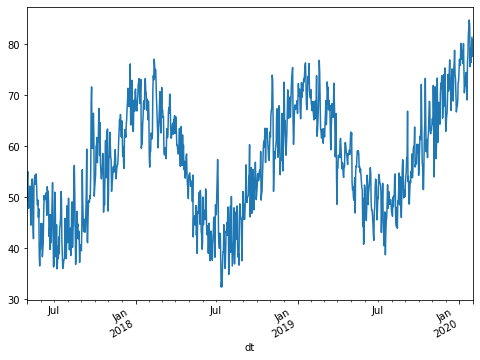

In [163]:
get_data.plot(subplots=True)

In [164]:
TRAININGSIZE = 700
get_data = get_data.values
get_train_mean = get_data[:TRAININGSIZE].mean()
get_train_standered = get_data[:TRAININGSIZE].std()

In [165]:
get_data = (get_data-get_train_mean)/get_train_standered

In [166]:
past_size =150
future_size =0

x_train, y_train = process_data(get_data, 0,TRAININGSIZE, past_size,future_size)

x_test, y_test = process_data(get_data,TRAININGSIZE, None,past_size,future_size)

In [167]:
print ('Past history')
print (x_train[0])
print ('\nTemperature To PRedict')
print (y_train[0])

Past history
[[-0.61011896]
 [-0.2477211 ]
 [-0.08051437]
 [-0.37854813]
 [-0.7493413 ]
 [-0.51777047]
 [-0.69966901]
 [-0.34286803]
 [-0.64230101]
 [-1.05856882]
 [-0.80880813]
 [-0.30438949]
 [-0.21413983]
 [-0.4841892 ]
 [-1.07745829]
 [-1.30553107]
 [-0.37015281]
 [-0.2260332 ]
 [-0.14557808]
 [-0.3120852 ]
 [-0.17146364]
 [-0.12179134]
 [-0.3260774 ]
 [-0.58703184]
 [-0.6919733 ]
 [-0.59752599]
 [-0.91654804]
 [-0.75773662]
 [-1.58957263]
 [-1.80505244]
 [-1.5224101 ]
 [-1.50352063]
 [-1.02778599]
 [-1.3006338 ]
 [-1.03198365]
 [-1.63644649]
 [-1.51751283]
 [-1.38108892]
 [-0.84518784]
 [-0.51637125]
 [-0.59752599]
 [-0.53246228]
 [-0.56044667]
 [-0.47019701]
 [-0.58703184]
 [-0.87919665]
 [-0.3547614 ]
 [-0.46879779]
 [-0.43941418]
 [-0.62271194]
 [-1.26215526]
 [-1.10964033]
 [-1.50352063]
 [-0.86477692]
 [-1.24816307]
 [-1.37899009]
 [-0.96342189]
 [-0.60312286]
 [-0.28130237]
 [-0.8850656 ]
 [-1.8232423 ]
 [-1.81204854]
 [-1.74558561]
 [-0.45480559]
 [-0.61221779]
 [-1.3265193

In [168]:
def time_axis(length):
  return list(range(-length, 0))

In [169]:
def create_plot(data,delta,plot_title):
  plot_labels = ['Past Data', 'Acctual Future', 'Predcted Future']
  plot_markers = ['.-', 'rx', 'go']
  time_bar = time_axis(data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(plot_title)
  for i, x in enumerate(data):
    if i:
      plt.plot(future,data[i],plot_markers[i],markersize=12,
               label=plot_labels[i])
    else:
      plt.plot(time_bar,data[i].flatten(), plot_markers[i], label=plot_labels[i])
  plt.legend()
  plt.xlim([time_bar[0], (future+5)*2])
  plt.xlabel('Time')
  plt.ylabel('Temperature')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\envs\\yasas_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

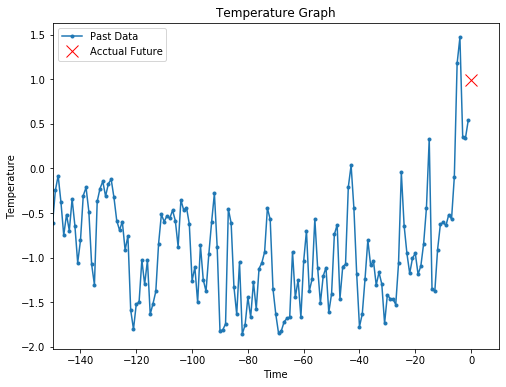

In [170]:
create_plot([x_train[0], y_train[0]], 0, 'Temperature Graph')

In [171]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

validation_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_data = validation_data.batch(BATCH_SIZE).repeat()

In [172]:
temperature_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(1)
])

temperature_model.compile(optimizer='adam', loss='mae')

In [173]:
for x, y in validation_data.take(1):
    print(temperature_model.predict(x).shape)

(157, 1)


In [174]:
INTERVAL_TIME = 200
EPOCHS = 10

temperature_history=temperature_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=INTERVAL_TIME,
                      validation_data=validation_data, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 30s 150ms/step - loss: 0.4190 - val_loss: 0.4351
Epoch 2/10
200/200 [==============================] - 23s 116ms/step - loss: 0.3331 - val_loss: 0.3995
Epoch 3/10
200/200 [==============================] - 24s 118ms/step - loss: 0.3116 - val_loss: 0.3637
Epoch 4/10
200/200 [==============================] - 23s 114ms/step - loss: 0.2973 - val_loss: 0.3468
Epoch 5/10
200/200 [==============================] - 24s 120ms/step - loss: 0.2863 - val_loss: 0.3348 ETA: 0s - loss: 0
Epoch 6/10
200/200 [==============================] - 27s 135ms/step - loss: 0.2724 - val_loss: 0.3149
Epoch 7/10
200/200 [==============================] - 25s 124ms/step - loss: 0.2649 - val_loss: 0.2999
Epoch 8/10
200/200 [==============================] - 23s 115ms/step - loss: 0.2618 - val_loss: 0.2982
Epoch 9/10
200/200 [==============================] - 24s 119ms/step - loss: 0.2591 - val_loss: 0.2922
Epoch 10/10


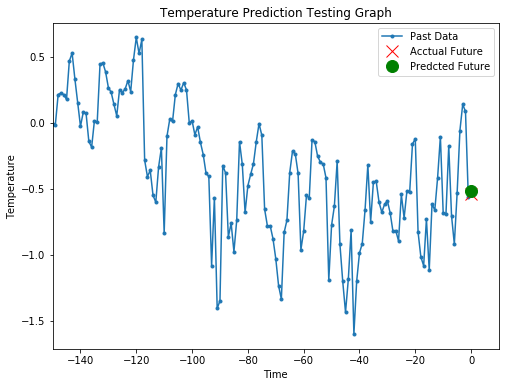

In [175]:
# For the Accuracy we get validation and training loss of the last step. In time series predictions the we dont get accuracy. We only get mean squard error
for x, y in validation_data.take(1):
  plot = create_plot([x[0].numpy(), y[0].numpy(),
                    temperature_model.predict(x)[0]], 0, 'Temperature Prediction Testing Graph')
  plot.show()

In [176]:
# from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
# simple_lstm_model.predict(x_test)

In [177]:
def trainig_validation_loss(model_history, title):
  training_loss = model_history.history['loss']
  validation_loss = model_history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

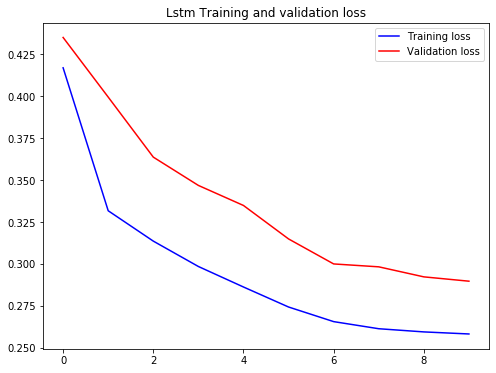

In [178]:
plot_train_history(temperature_history,
                    'Lstm Training and validation loss')

In [179]:
final_loss = temperature_model.evaluate(x_test,y_test,verbose=2)

157/157 - 1s - loss: 0.2896


In [180]:
temperature_model.save('TemperaturePrediction.h5') 

In [181]:
predict_data = df['temp']
predict_data.index = df['dt']
predict_data.head()
OUTPUT_SPLIT = 677
predict_data = predict_data.values
predict_train_mean = predict_data[OUTPUT_SPLIT:].mean()
predict_train_std = predict_data[OUTPUT_SPLIT:].std()

In [182]:
predict_data = (predict_data[OUTPUT_SPLIT:]-predict_train_mean)/predict_train_std

In [183]:
len(predict_data)

330

In [184]:
x_test, y_test = process_data(predict_data,0,330,
                                       150,
                                       future_size)

x=temperature_model.predict(x_test)
len(x)

180

In [185]:
denormalized=[]
for i in y_test:
    denormalized.append(i*output_train_std+ouput_train_mean)
denormalized

[50.48554780776269,
 50.43356581918633,
 54.27321953093446,
 54.698151659773025,
 47.191292420601535,
 45.197411858779375,
 44.48822901463035,
 48.23670796863739,
 44.13920709133188,
 49.44219503705129,
 48.958680032198075,
 51.55489157276228,
 54.87059984409782,
 48.76395385276914,
 48.65503921003772,
 54.12676234089787,
 48.49249235687033,
 46.228800521008935,
 50.328364175638924,
 55.35370229348613,
 57.46227327454822,
 56.887170956489015,
 50.05112690323162,
 50.25740463567752,
 51.56190501566544,
 50.280507741711475,
 52.68941910121477,
 54.076018018716184,
 54.98529026333771,
 57.89380629082504,
 57.508892042081,
 66.87926431616879,
 53.23564253673155,
 54.203910212832646,
 48.94754103464601,
 48.83326317087098,
 51.539627020561284,
 53.35569617701506,
 53.049167466600466,
 55.20311954880062,
 54.23773976095376,
 58.576585585221004,
 53.946063047275246,
 55.543890362801285,
 59.63066479801957,
 60.043220262911404,
 60.06054759243687,
 63.80325076993541,
 56.03483136602253,
 56.38

In [186]:
denormalized=[]
for i in x:
    denormalized.append(i*output_train_std+ouput_train_mean)
denormalized

[array([48.72249], dtype=float32),
 array([49.86772], dtype=float32),
 array([50.00746], dtype=float32),
 array([52.456757], dtype=float32),
 array([53.003853], dtype=float32),
 array([48.547424], dtype=float32),
 array([46.978477], dtype=float32),
 array([46.417282], dtype=float32),
 array([48.089798], dtype=float32),
 array([46.536613], dtype=float32),
 array([48.755054], dtype=float32),
 array([49.057854], dtype=float32),
 array([50.641754], dtype=float32),
 array([53.00114], dtype=float32),
 array([49.326317], dtype=float32),
 array([48.888893], dtype=float32),
 array([52.19303], dtype=float32),
 array([49.14363], dtype=float32),
 array([47.611797], dtype=float32),
 array([49.608383], dtype=float32),
 array([53.17857], dtype=float32),
 array([55.11495], dtype=float32),
 array([54.878506], dtype=float32),
 array([50.413795], dtype=float32),
 array([50.17057], dtype=float32),
 array([51.051704], dtype=float32),
 array([50.346275], dtype=float32),
 array([51.86158], dtype=float32),
 a

In [187]:
denormalized[1][0]

49.86772

In [188]:
f = open("temperatures.txt", "a")

for i in range(len(denormalized)):
    
    f.write(str(denormalized[i][0]))
    f.write("\n")
            
f.close()
f = open("temperatures.txt", "r")
print(f.read())

48.72249
49.86772
50.00746
52.456757
53.003853
48.547424
46.978477
46.417282
48.089798
46.536613
48.755054
49.057854
50.641754
53.00114
49.326317
48.888893
52.19303
49.14363
47.611797
49.608383
53.17857
55.11495
54.878506
50.413795
50.17057
51.051704
50.346275
51.86158
52.997707
53.7435
55.94324
55.80123
62.04255
53.722057
53.834206
50.558567
50.08323
51.757366
53.261253
53.14377
54.742756
54.072784
57.412643
53.936447
55.21427
58.515438
59.002533
59.22794
62.476112
56.27676
56.826702
57.526745
57.23863
60.489365
59.84355
59.273064
60.839146
55.81516
57.363007
59.893913
62.318016
61.690716
63.974056
70.065056
63.558147
58.470257
58.00674
54.632835
54.422306
58.41726
63.40323
65.28846
71.179146
64.40768
60.178135
62.93963
61.686626
59.440773
63.05151
63.47386
66.33477
68.79603
68.51162
63.395
63.953228
64.364395
64.447205
65.48248
66.36978
65.07955
71.50812
66.31377
56.422916
64.24314
71.08319
69.498634
58.81639
62.055904
64.295555
72.06203
60.901825
63.497326
69.238495
68.39861
67.1404